## Reference the Packages/Toolboxes

I use numpy to process arraies and matrices.  
I use pandas to read and process the original datasets.  
I use matplotlib.pyplot to plot ROC curves and decision statistic surfaces.  
To plot decision statistic surfaces, I also referenced the ECE580 course materials and the website below.  
https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07  
I use metrics from sklearn to calculate area under curve (AUC).  
I also use sklearn to implement KNN classifiers and cross-validation.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

In [2]:
filename1 = "dataSetHorseshoes.csv"
filename2 = "dataSetHorseshoesTest.csv"
dataframe1 = pd.read_csv(filename1, header = None)
dataframe2 = pd.read_csv(filename2, header = None)

In [3]:
data = dataframe1.to_numpy()
testdata = dataframe2.to_numpy()
N = data.shape[0]
print(data.shape)
print(testdata.shape)
print(data[0:3, :])

(400, 3)
(400, 3)
[[ 1.     0.937  1.097]
 [ 0.    -1.144 -0.668]
 [ 1.     0.007 -0.344]]


In [4]:
def visualize_dataset (data) :
    class0 = data[data[:,0] == 0., 1:]
    class1 = data[data[:,0] == 1., 1:]
    figure, axis = plt.subplots()
    axis.scatter(class0[:, 0], class0[:, 1], label = "Class 0", linewidths = 3)
    axis.scatter(class1[:, 0], class1[:, 1], label = "Class 1", linewidths = 3)
    axis.set_xlabel("Feature 1", fontsize = 15)
    axis.set_ylabel("Feature 2", fontsize = 15)
    axis.set_title("Visualize Dataset", fontsize = 15)
    #axis.grid()
    figure.set_size_inches(8, 6)
    plt.xticks(np.linspace(-2, 2, num = 9), fontsize = 12)
    plt.yticks(np.linspace(-2, 2, num = 9), fontsize = 12)
    plt.legend(fontsize = 12)
    plt.show()
    return None

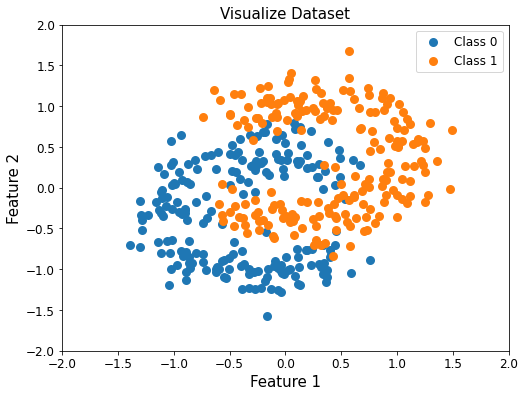

In [5]:
visualize_dataset(data)

In [6]:
def majority_vote (k) :
    floor_int = int(np.floor(float(k) / 2))
    return (1 + floor_int)
# print(majority_vote(1))
# print(majority_vote(5))
# print(majority_vote(31))
# print(majority_vote(91))

In [7]:
def knn_thres (k) :
    thres = np.zeros(k + 2)
    for i in range(k + 1) :
        thres[i] = float(i) / k
    thres[k + 1] = float("inf")
    return thres
# print(knn_thres(5))

In [8]:
def find_mvdb (major_vote, zz) :
    mvdbx = []
    mvdby = []
    for i in range(zz.shape[0]) :
        for j in range(zz.shape[1]) :
            if zz[i, j] == major_vote :
                mvdbx.append(i)
                mvdby.append(j)
    return np.array(mvdbx), np.array(mvdby)

In [9]:
def visualize_dss (data, k) :
    x1max = np.max(data[:, 1])
    x1min = np.min(data[:, 1])
    x2max = np.max(data[:, 2])
    x2min = np.min(data[:, 2])
    x1Range = x1max - x1min
    x2Range = x2max - x2min
    x1 = np.linspace((x1min - (0.2 * x1Range)), (x1max + (0.2 * x1Range)), 251)
    x2 = np.linspace((x2min - (0.2 * x2Range)), (x2max + (0.2 * x2Range)), 251)
    xx, yy = np.meshgrid(x1, x2)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1, r2))
    knnmodel = KNeighborsClassifier(n_neighbors = k)
    X = data[:, 1:]
    y = data[:, 0]
    knnmodel.fit(X, y)
    
    print(grid.shape)
    
    yhat = knnmodel.predict_proba(grid)
    yhat_H1 = yhat[:, 1]
    zz = yhat_H1.reshape(xx.shape)
    figure, axis = plt.subplots()
    c1 = axis.contourf(xx, yy, zz, cmap = mpl.cm.cool)
    plt.colorbar(c1)
    major_vote = float(majority_vote(k)) / k
    c2 = axis.contour(xx, yy, zz >= major_vote, colors = "r", linewidths = 3)
    # mvdbx, mvdby = find_mvdb(major_vote, zz)
    # axis.plot(xx[0, mvdbx], yy[mvdby, 0], label = "Majority Vote Decision Boundary", linewidth = 1, c = "r")
    axis.scatter(data[data[:,0]==0., 1], data[data[:,0]==0., 2], label = "H0 Data", linewidths = 2, c = "k")
    axis.scatter(data[data[:,0]==1., 1], data[data[:,0]==1., 2], label = "H1 Data", linewidths = 2, c = "g")
    figure.set_size_inches((9, 6))
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.legend(fontsize = 12)
    plt.show()
    return None

(63001, 2)


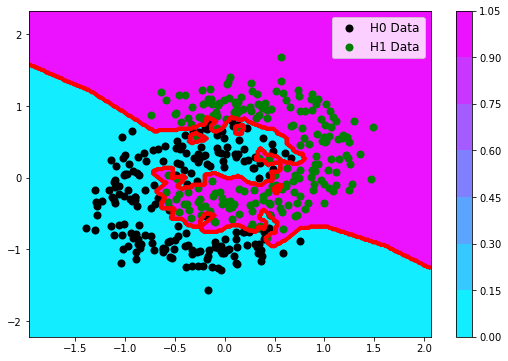

In [10]:
visualize_dss(data, k = 1)

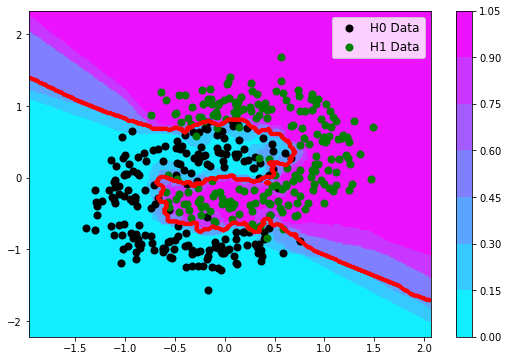

In [11]:
visualize_dss(data, k = 5)

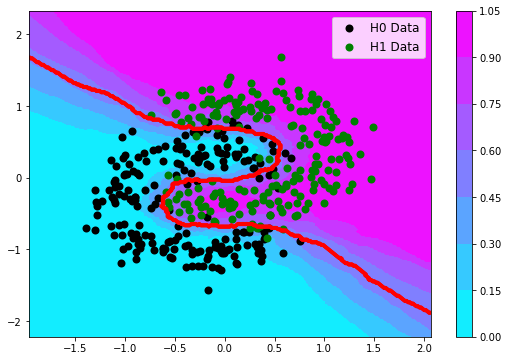

In [12]:
visualize_dss(data, k = 31)

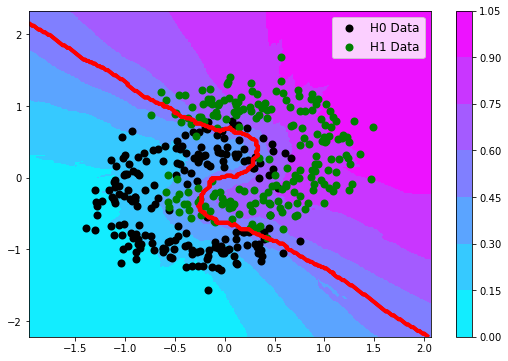

In [13]:
visualize_dss(data, k = 91)

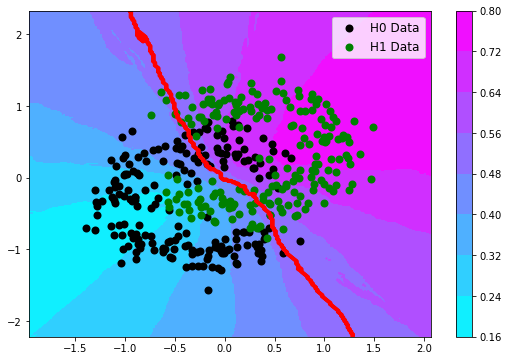

In [14]:
visualize_dss(data, k = (int(N / 2) - 1))

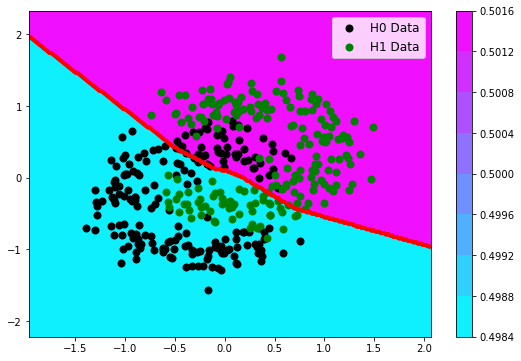

In [15]:
visualize_dss(data, k = (N - 1))

In [16]:
def divide_labels (data) :
    npdata = np.copy(data)
    data0 = npdata[npdata[:,0] == 0., :]
    data1 = npdata[npdata[:,0] == 1., :]
    return data0, data1

def compute_PFA (H0, thres) :
    H0_ds = np.sort(H0[:, 1])
    false_alarm = float(len(H0_ds[H0_ds >= thres])) / (H0.shape[0])
    return false_alarm

def compute_PD (H1, thres) :
    H1_ds = np.sort(H1[:, 1])
    detection = float(len(H1_ds[H1_ds >= thres])) / (H1.shape[0])
    return detection

In [17]:
def compute_ROC (arr_data, knnthres) :
    arr_PD = np.zeros(len(knnthres))
    arr_PFA = np.zeros(len(knnthres))
    H0, H1 = divide_labels(arr_data)
    for i in range(len(knnthres)) :
        arr_PD[i] = compute_PD(H1, knnthres[i])
        arr_PFA[i] = compute_PFA(H0, knnthres[i])
    return np.flipud(arr_PD), np.flipud(arr_PFA)

In [18]:
def plot_ROC (arr_data, arr_k) :
    s1_pd, s1_pfa = compute_ROC(arr_data[0], knn_thres(arr_k[0]))
    s2_pd, s2_pfa = compute_ROC(arr_data[1], knn_thres(arr_k[1]))
    s3_pd, s3_pfa = compute_ROC(arr_data[2], knn_thres(arr_k[2]))
    s4_pd, s4_pfa = compute_ROC(arr_data[3], knn_thres(arr_k[3]))
    s5_pd, s5_pfa = compute_ROC(arr_data[4], knn_thres(arr_k[4]))
    s6_pd, s6_pfa = compute_ROC(arr_data[5], knn_thres(arr_k[5]))
    auc1 = metrics.auc(s1_pfa, s1_pd)
    auc2 = metrics.auc(s2_pfa, s2_pd)
    auc3 = metrics.auc(s3_pfa, s3_pd)
    auc4 = metrics.auc(s4_pfa, s4_pd)
    auc5 = metrics.auc(s5_pfa, s5_pd)
    auc6 = metrics.auc(s6_pfa, s6_pd)
    refln = np.linspace(0, 1, num = 101)
    figure, axis = plt.subplots()
    axis.plot(s1_pfa, s1_pd, label = "k = 1 (AUC = %.3f)" % auc1, linewidth = 4)
    axis.plot(s2_pfa, s2_pd, label = "k = 5 (AUC = %.3f)" % auc2, linewidth = 4)
    axis.plot(s3_pfa, s3_pd, label = "k = 31 (AUC = %.3f)" % auc3, linewidth = 4)
    axis.plot(s4_pfa, s4_pd, label = "k = 91 (AUC = %.3f)" % auc4, linewidth = 4)
    axis.plot(s5_pfa, s5_pd, label = "k = N / 2 - 1 (AUC = %.3f)" % auc5, linewidth = 4)
    axis.plot(s6_pfa, s6_pd, label = "k = N - 1 (AUC = %.3f)" % auc6, linewidth = 4)
    axis.plot(refln, refln, "--", label = "Chance Diagonal", linewidth = 3)
    axis.set_xlabel("PFA", fontsize = 15)
    axis.set_ylabel("PD", fontsize = 15)
    axis.set_title("ROC Curve", fontsize = 15)
    axis.grid()
    figure.set_size_inches(8, 6)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(fontsize = 12)
    plt.show()
    return None

In [19]:
arr_k = np.array([1, 5, 31, 91, int(N/2)-1, N-1])
arr_data5 = np.zeros((len(arr_k), data.shape[0], 2))
for i in range(len(arr_k)) :
    arr_data5[i, :, 0] = data[:, 0]
    
model51 = KNeighborsClassifier(n_neighbors = arr_k[0])
model52 = KNeighborsClassifier(n_neighbors = arr_k[1])
model53 = KNeighborsClassifier(n_neighbors = arr_k[2])
model54 = KNeighborsClassifier(n_neighbors = arr_k[3])
model55 = KNeighborsClassifier(n_neighbors = arr_k[4])
model56 = KNeighborsClassifier(n_neighbors = arr_k[5])

model51.fit(data[:, 1:], data[:, 0])
model52.fit(data[:, 1:], data[:, 0])
model53.fit(data[:, 1:], data[:, 0])
model54.fit(data[:, 1:], data[:, 0])
model55.fit(data[:, 1:], data[:, 0])
model56.fit(data[:, 1:], data[:, 0])

A = model51.predict_proba(data[:, 1:])
B = model52.predict_proba(data[:, 1:])
C = model53.predict_proba(data[:, 1:])
D = model54.predict_proba(data[:, 1:])
E = model55.predict_proba(data[:, 1:])
F = model56.predict_proba(data[:, 1:])

arr_data5[0, :, 1] = A[:, 1]
arr_data5[1, :, 1] = B[:, 1]
arr_data5[2, :, 1] = C[:, 1]
arr_data5[3, :, 1] = D[:, 1]
arr_data5[4, :, 1] = E[:, 1]
arr_data5[5, :, 1] = F[:, 1]

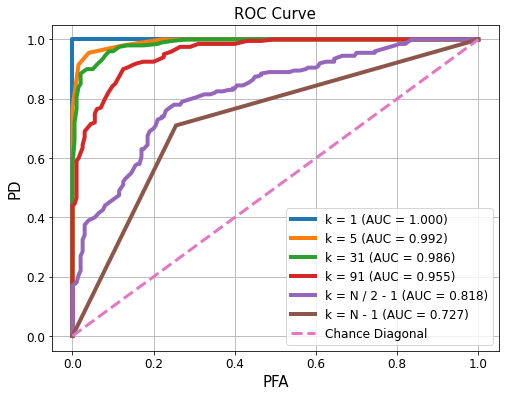

In [20]:
plot_ROC(arr_data5, arr_k)

In [21]:
print("%.4f" % model51.score(data[:, 1:], data[:, 0]))
print("%.4f" % model52.score(data[:, 1:], data[:, 0]))
print("%.4f" % model53.score(data[:, 1:], data[:, 0]))
print("%.4f" % model54.score(data[:, 1:], data[:, 0]))
print("%.4f" % model55.score(data[:, 1:], data[:, 0]))
print("%.4f" % model56.score(data[:, 1:], data[:, 0]))

1.0000
0.9575
0.9325
0.8800
0.7575
0.7275


In [22]:
arr_k = np.array([1, 5, 31, 91, int(N/2)-1, N-1])
arr_data6 = np.zeros((len(arr_k), testdata.shape[0], 2))
for i in range(len(arr_k)) :
    arr_data6[i, :, 0] = testdata[:, 0]
    
model61 = KNeighborsClassifier(n_neighbors = arr_k[0])
model62 = KNeighborsClassifier(n_neighbors = arr_k[1])
model63 = KNeighborsClassifier(n_neighbors = arr_k[2])
model64 = KNeighborsClassifier(n_neighbors = arr_k[3])
model65 = KNeighborsClassifier(n_neighbors = arr_k[4])
model66 = KNeighborsClassifier(n_neighbors = arr_k[5])

model61.fit(data[:, 1:], data[:, 0])
model62.fit(data[:, 1:], data[:, 0])
model63.fit(data[:, 1:], data[:, 0])
model64.fit(data[:, 1:], data[:, 0])
model65.fit(data[:, 1:], data[:, 0])
model66.fit(data[:, 1:], data[:, 0])

A = model61.predict_proba(testdata[:, 1:])
B = model62.predict_proba(testdata[:, 1:])
C = model63.predict_proba(testdata[:, 1:])
D = model64.predict_proba(testdata[:, 1:])
E = model65.predict_proba(testdata[:, 1:])
F = model66.predict_proba(testdata[:, 1:])

arr_data6[0, :, 1] = A[:, 1]
arr_data6[1, :, 1] = B[:, 1]
arr_data6[2, :, 1] = C[:, 1]
arr_data6[3, :, 1] = D[:, 1]
arr_data6[4, :, 1] = E[:, 1]
arr_data6[5, :, 1] = F[:, 1]

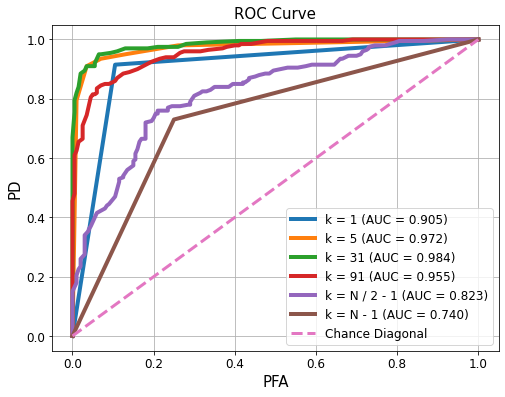

In [23]:
plot_ROC(arr_data6, arr_k)

In [24]:
print("%.4f" % model61.score(testdata[:, 1:], testdata[:, 0]))
print("%.4f" % model62.score(testdata[:, 1:], testdata[:, 0]))
print("%.4f" % model63.score(testdata[:, 1:], testdata[:, 0]))
print("%.4f" % model64.score(testdata[:, 1:], testdata[:, 0]))
print("%.4f" % model65.score(testdata[:, 1:], testdata[:, 0]))
print("%.4f" % model66.score(testdata[:, 1:], testdata[:, 0]))

0.9050
0.9325
0.9375
0.8775
0.7650
0.7400


In [25]:
######################################################################

In [26]:
print(data.shape)
print(testdata.shape)
print(data[0:3, :])

(400, 3)
(400, 3)
[[ 1.     0.937  1.097]
 [ 0.    -1.144 -0.668]
 [ 1.     0.007 -0.344]]


In [27]:
sample_k = np.array([1, 2, 4, 5, 8, 10, 20, 40, 50, 80, 100, 200, 399]).astype(int)
print(sample_k.shape)
print(sample_k)
N_divide_k = (N / sample_k).astype(int)
print(N_divide_k.shape)
print(N_divide_k)

(13,)
[  1   2   4   5   8  10  20  40  50  80 100 200 399]
(13,)
[400 200 100  80  50  40  20  10   8   5   4   2   1]


In [ ]:
# Block 28 is only for incremental testing

In [28]:
cvmodel = KNeighborsClassifier(n_neighbors = 5)
cvresults = cross_validate(estimator = cvmodel, 
                           X = data[:, 1:], y = data[:, 0], cv = 10)
print(type(cvresults))
print(cvresults.keys())
print(cvresults["test_score"])
print(type(cvresults["test_score"]))
print("%.4f" % np.mean(cvresults["test_score"]))

<class 'dict'>
dict_keys(['fit_time', 'score_time', 'test_score'])
[0.925 0.9   0.975 0.925 0.925 0.925 0.9   0.975 0.925 0.95 ]
<class 'numpy.ndarray'>
0.9325


In [29]:
def compute_Pe (sample_k, case) :
    Pe = np.zeros(sample_k.shape[0])
    for i in range(sample_k.shape[0]) :
        model = KNeighborsClassifier(n_neighbors = sample_k[i])
        if case == 1 :
            model.fit(data[:, 1:], data[:, 0])
            Pcd = model.score(data[:, 1:], data[:, 0])
            Pe[i] = 1 - Pcd
        if case == 2 :
            model.fit(data[:, 1:], data[:, 0])
            Pcd = model.score(testdata[:, 1:], testdata[:, 0])
            Pe[i] = 1 - Pcd
        if case == 3 :
            if sample_k[i] != np.max(sample_k) :
                cvresults = cross_validate(estimator = model, X = data[:, 1:], y = data[:, 0], cv = 10)
                Pcd = np.mean(cvresults["test_score"])
                Pe[i] = 1 - Pcd
            else :
                Pe[i] = np.nan
    return Pe

In [30]:
def plot_Pe (Pe1, Pe2, Pe3, N_k) :
    figure, axis = plt.subplots()
    xaxis = np.flipud(N_k)
    adjustx = np.arange(xaxis.shape[0])
    axis.plot(adjustx, np.flipud(Pe1), label = "Case 1) Testing on Training Data", linewidth = 3)
    axis.plot(adjustx, np.flipud(Pe2), label = "Case 2) Testing on Separate Testing Data", linewidth = 3)
    axis.plot(adjustx, np.flipud(Pe3), label = "Case 3) 10-folds Cross Validation on Training Data", linewidth = 3)
    axis.set_xlabel("N / k", fontsize = 15)
    axis.set_ylabel("minPe = 1 - maxPcd", fontsize = 15)
    axis.set_title("Question 7 Plot", fontsize = 15)
    axis.grid()
    figure.set_size_inches(8, 5)
    plt.xticks(adjustx, xaxis, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.legend(fontsize = 12)
    plt.show()
    return None

In [31]:
Pe_case1 = compute_Pe(sample_k, case = 1)

In [32]:
Pe_case2 = compute_Pe(sample_k, case = 2)

In [33]:
Pe_case3 = compute_Pe(sample_k, case = 3)

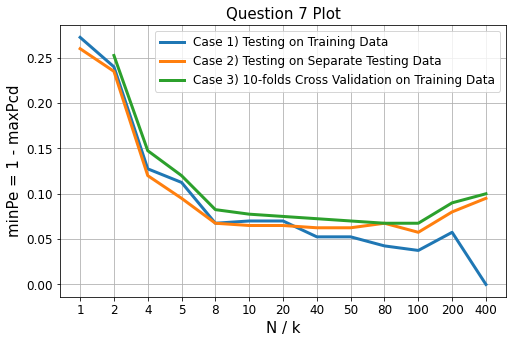

In [34]:
plot_Pe(Pe_case1, Pe_case2, Pe_case3, N_divide_k)